# Código de ayuda para generar gráficas y reportes

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Cargar los CSV
df_emisor = pd.read_csv('./data/test_emisor.csv')
df_receptor = pd.read_csv('./data/test_receptor.csv')

In [42]:
# Hacer el merge por transmittedMessage (emisor) y receivedMessage (receptor)
df_merged = pd.merge(df_emisor, df_receptor, left_on='transmittedMessage', right_on='receivedMessage', how='outer')
df_merged['mensaje_correcto'] = df_merged['originalMessage'] == df_merged['decodedTextMessage']
df_merged.to_csv('./data/merged_output.csv', index=False)
print("Merge completado y guardado en 'merged_output.csv'")

Merge completado y guardado en 'merged_output.csv'


In [43]:
df = pd.read_csv('./data/merged_output.csv')

## Tasa de error por algoritmo

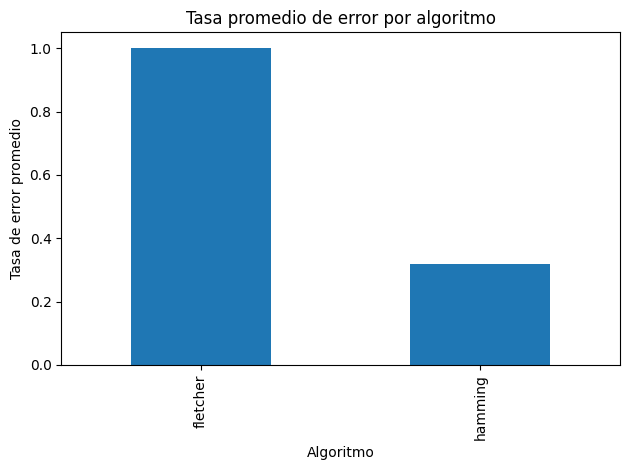

In [44]:
df.groupby('selectedAlgorithm')['errorRate'].mean().plot(kind='bar')
plt.title('Tasa promedio de error por algoritmo')
plt.xlabel('Algoritmo')
plt.ylabel('Tasa de error promedio')
plt.tight_layout()
plt.show()

## Mensajes correctamente decodificados por algoritmo

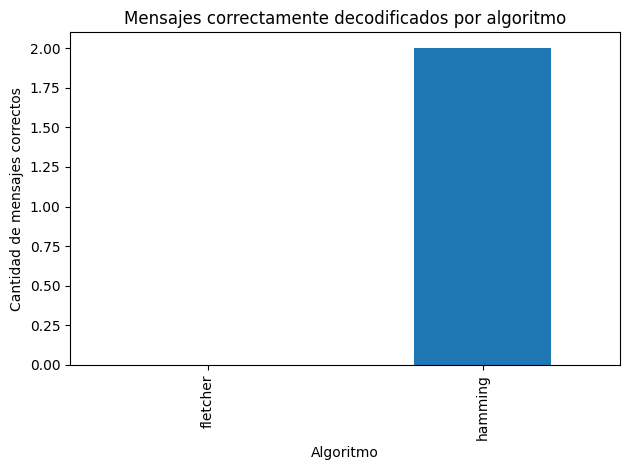

In [45]:
df.groupby('selectedAlgorithm')['mensaje_correcto'].sum().plot(kind='bar')
plt.title('Mensajes correctamente decodificados por algoritmo')
plt.xlabel('Algoritmo')
plt.ylabel('Cantidad de mensajes correctos')
plt.tight_layout()
plt.show()

## Overhead por algoritmo (bits extra añadidos)

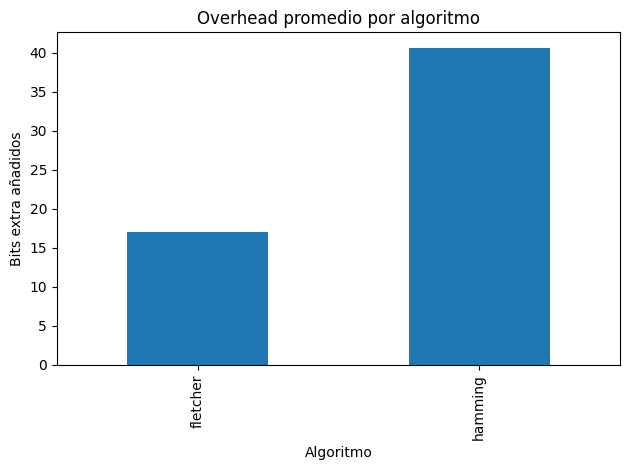

In [46]:
df['overhead'] = df['encodedMessage'].str.len() - df['bitMessage'].str.len()
df.groupby('selectedAlgorithm')['overhead'].mean().plot(kind='bar')
plt.title('Overhead promedio por algoritmo')
plt.xlabel('Algoritmo')
plt.ylabel('Bits extra añadidos')
plt.tight_layout()
plt.show()

## Distribución de detección y corrección

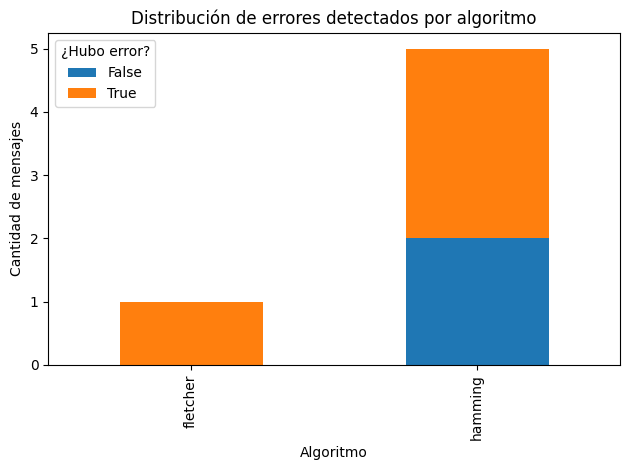

In [47]:
df.groupby(['selectedAlgorithm', 'isError']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Distribución de errores detectados por algoritmo')
plt.xlabel('Algoritmo')
plt.ylabel('Cantidad de mensajes')
plt.legend(title='¿Hubo error?')
plt.tight_layout()
plt.show()

## Tasa de corrección exitosa (solo para Hamming)

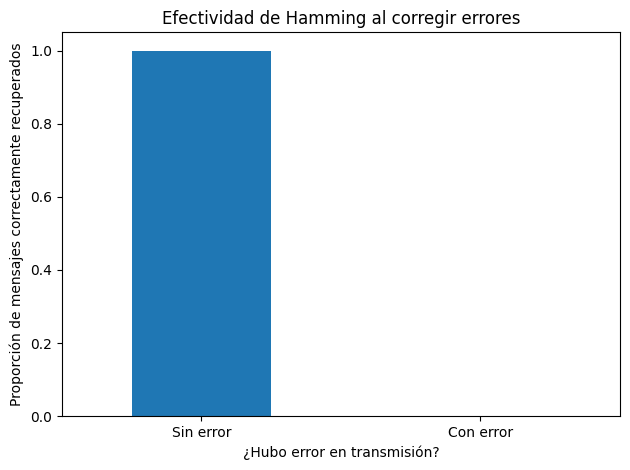

In [48]:
hamming = df[df['selectedAlgorithm'] == 'hamming']
correcciones = hamming.groupby('isError')['mensaje_correcto'].mean()

correcciones.plot(kind='bar')
plt.title('Efectividad de Hamming al corregir errores')
plt.xlabel('¿Hubo error en transmisión?')
plt.ylabel('Proporción de mensajes correctamente recuperados')
plt.xticks([0, 1], ['Sin error', 'Con error'], rotation=0)
plt.tight_layout()
plt.show()

## Comparación de mensajes erróneos detectados vs corregidos

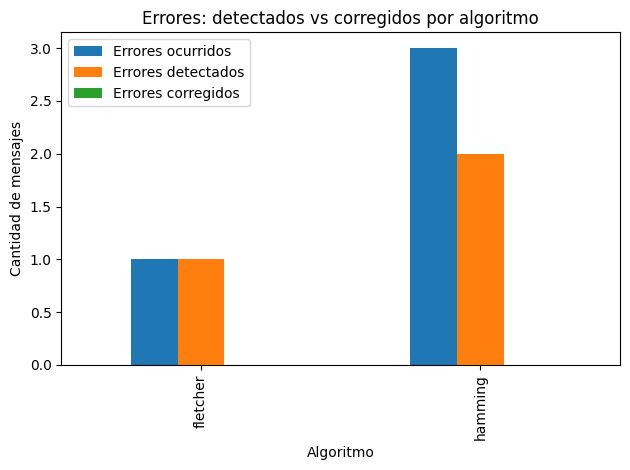

In [49]:
# Asegurar que los campos booleanos estén correctamente convertidos
df['errorDetected'] = df['errorDetected'].astype(str).str.lower() == 'true'
df['isError'] = df['isError'].astype(str).str.lower() == 'true'
df['mensaje_correcto'] = df['originalMessage'] == df['decodedTextMessage']

# Crear nueva columna: error detectado y corregido
df['error_detectado_y_corregido'] = df['errorDetected'] & df['mensaje_correcto']

# Agrupar por algoritmo y contar errores, detecciones y correcciones
resumen = df.groupby('selectedAlgorithm')[['isError', 'errorDetected', 'error_detectado_y_corregido']].sum()

# Graficar
resumen.plot(kind='bar', stacked=False)
plt.title('Errores: detectados vs corregidos por algoritmo')
plt.xlabel('Algoritmo')
plt.ylabel('Cantidad de mensajes')
plt.legend(['Errores ocurridos', 'Errores detectados', 'Errores corregidos'])
plt.tight_layout()
plt.show()

## Coincidencia de algoritmo entre emisor y receptor

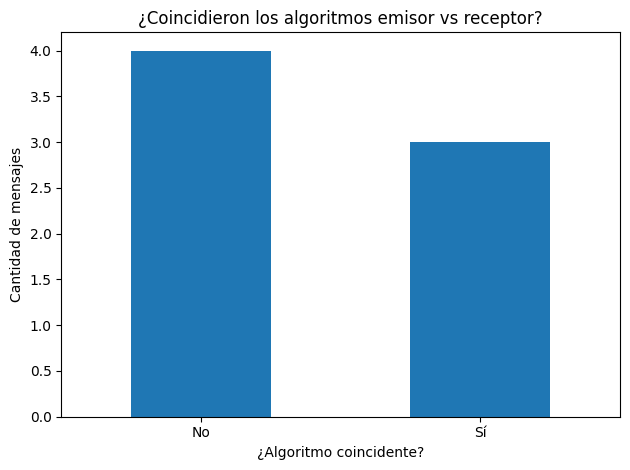

In [50]:
df['algoritmo_match'] = df['selectedAlgorithm'] == df['detectedAlgorithm']
df['algoritmo_match'].value_counts().plot(kind='bar')
plt.title('¿Coincidieron los algoritmos emisor vs receptor?')
plt.xlabel('¿Algoritmo coincidente?')
plt.ylabel('Cantidad de mensajes')
plt.xticks([0, 1], ['No', 'Sí'], rotation=0)
plt.tight_layout()
plt.show()

## Diferencia de longitud de dataBits entre emisor y receptor

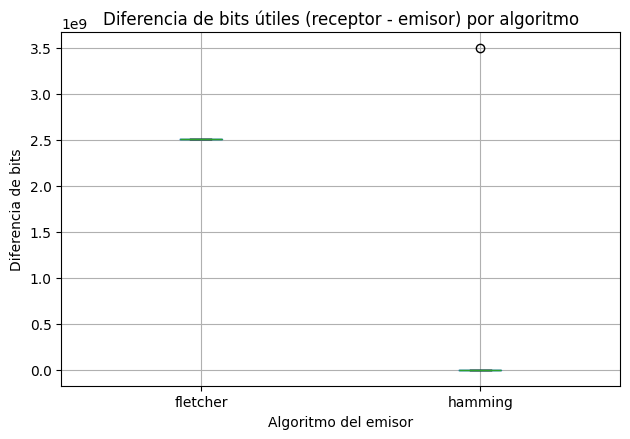

In [51]:
df['diferencia_dataBits'] = df['dataBitsCount_y'] - df['dataBitsCount_x']

df[df['diferencia_dataBits'].notnull()].boxplot(column='diferencia_dataBits', by='selectedAlgorithm')
plt.title('Diferencia de bits útiles (receptor - emisor) por algoritmo')
plt.suptitle('')
plt.xlabel('Algoritmo del emisor')
plt.ylabel('Diferencia de bits')
plt.tight_layout()
plt.show()